In [12]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the data
jsonl_path="data/20240919152121_llm_gen.jsonl"
df=pd.read_json(jsonl_path,lines=True)
df=df.drop(columns=["record","prompt"])
df

,actual_value,CompoundName,SMILES,Property,Unit,predicted,reason,error_rate
0,-100.300000,Boron trifluoride,FB(F)F,Boiling temperature,[oC],-129.0,Compound X is a nonpolar molecule with a trigo...,0.286142
1,5.120000,Gallium(III) oxide,O=[Ga]O[Ga]=O,Absolute standard enthalpy of formation,[kJ/mol],-1062.0,To predict the absolute standard enthalpy of f...,208.421875
2,279.000000,Acenaphthene,c2cc1cccc3c1c(c2)CC3,Boiling temperature,[oC],251.0,Compound X is a polycyclic aromatic hydrocarbo...,0.100358
3,302.222222,unknown,C1=CC=C(C=C1)C2=CC=C(C=C2)N,Boiling temperature,[oC],287.0,"The given compound, (*), contains several func...",0.050368
4,147.777778,unknown,CCCCC(=O)CC,Boiling temperature,[oC],151.0,To predict the boiling temperature of the Comp...,0.021805
...,...,...,...,...,...,...,...,...
21436,54.000000,Nonivamide,CCCCCCCCC(=O)NCC1=CC(=C(C=C1)O)OC,Melting temperature,[oC],120.0,To predict the melting temperature of Compound...,1.222222
21437,-37.222222,unknown,CC(C)N,Flash temperature,[oC],-37.2,To predict the Flash temperature of the Compou...,0.000597
21438,4747.000000,unknown,OP(=O)([O-])OP(=O)([O-])[O-].[Na+].[Na+].[Na+],Absolute standard enthalpy of formation,[kJ/mol],-1287.0,To predict the absolute standard enthalpy of f...,1.271119
21439,75.000000,"N-Isopropyl-N'-phenyl-1,4-phenylenediamine",CC(C)NC1=CC=C(C=C1)NC2=CC=CC=C2,Melting temperature,[oC],127.0,"To predict the melting point of Compound X, le...",0.693333


<Axes: xlabel='error_rate', ylabel='Count'>

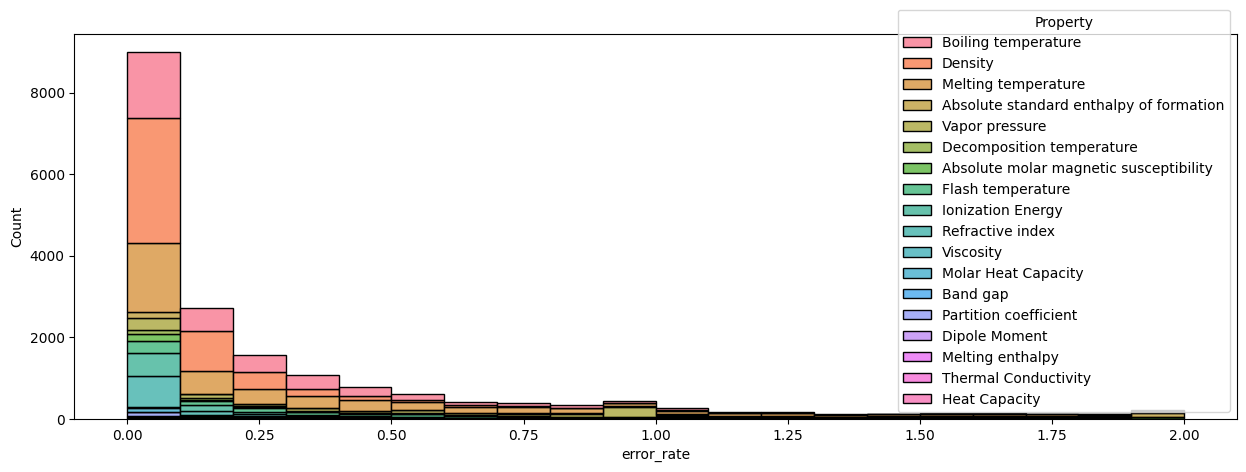

In [13]:
plt.figure(figsize=(15, 5))
sns.histplot(df[df["error_rate"]<2], x="error_rate", hue="Property", multiple="stack", 
             bins=20)

In [19]:
for t in sorted(list(set(df["Property"]))):
    print(t)

Absolute molar magnetic susceptibility
Absolute standard enthalpy of formation
Band gap
Boiling temperature
Decomposition temperature
Density
Dipole Moment
Flash temperature
Heat Capacity
Ionization Energy
Melting enthalpy
Melting temperature
Molar Heat Capacity
Partition coefficient
Refractive index
Thermal Conductivity
Vapor pressure
Viscosity


In [14]:

df["error_rate"].median()

0.15796584000771902

In [15]:

error_threshold=0.1
max_records=200

df=pd.read_json(jsonl_path,lines=True)
df=df.drop(columns=["record","prompt"])
df=df.sort_values(by="error_rate")
df["cond"]=df["CompoundName"]+" "+df["SMILES"]+" "+df["Property"]
df=df.drop_duplicates(subset=["cond"])
df=df[df["error_rate"]<error_threshold]
df

,actual_value,CompoundName,SMILES,Property,Unit,predicted,reason,error_rate,cond
10899,1.530000,Sodium ferrocyanide,[Na+].[Na+].N#C[Fe-4](C#N)(C#N)(C#N)(C#N)C#N.[...,Refractive index,[-],1.53,"To predict the refractive index of Compound X,...",0.0,Sodium ferrocyanide [Na+].[Na+].N#C[Fe-4](C#N)...
4984,680.000000,unknown,[O-]S(=O)(=O)[O-].[Fe+2],Decomposition temperature,[oC],680.00,To predict the decomposition temperature of th...,0.0,unknown [O-]S(=O)(=O)[O-].[Fe+2] Decomposition...
17267,300.000000,Potassium arsenite,[O-][As]=O.[K+],Melting temperature,[oC],300.00,To predict the melting temperature of Compound...,0.0,Potassium arsenite [O-][As]=O.[K+] Melting tem...
17259,685.000000,unknown,[Se],Boiling temperature,[oC],685.00,"To predict the boiling point of Selenium (Se),...",0.0,unknown [Se] Boiling temperature
17249,0.250000,Polytetrafluoroethylene,None,Thermal Conductivity,[W/m/K],0.25,"Compound X, also known as Teflon, is a synthet...",0.0,NaN
...,...,...,...,...,...,...,...,...,...
3627,2.222222,unknown,NN,Melting temperature,[oC],2.00,To predict the melting temperature of an Compo...,0.1,unknown NN Melting temperature
1488,4.444444,unknown,CC1=CC=CC=C1,Flash temperature,[oC],4.00,To predict the flash temperature of the Compou...,0.1,unknown CC1=CC=CC=C1 Flash temperature
15303,4.000000,Palladium(II) chloride,Cl[Pd]Cl,Density,[g/cm3],3.60,"To predict the density of Compound X, we can c...",0.1,Palladium(II) chloride Cl[Pd]Cl Density
10357,2.000000,unknown,CC(C)CC(=O)CC(C)C,Vapor pressure,[kPa],1.80,To predict the vapor pressure of the Compound ...,0.1,unknown CC(C)CC(=O)CC(C)C Vapor pressure
